In [6]:
import os
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [7]:
def arquivos_SIH(mes_inicio, ano_inicio, mes_fim, ano_fim, estado, codigo_municipio, cidade):
    arquivos_selecionados = []
    codigo_municipio = str(codigo_municipio)[:-1] # Remove o dígito do município para ficar no padrão dos arquivos .csv
    
    for root, dirs, files in os.walk("./ETLSIH"):  # Diretório dos arquivos SIH
        for file in files:
            if file.startswith("ETLSIH.ST_"):  # Procurar por arquivos que começam com "ETLSIH.ST_"
                
                # Extrair partes do nome do arquivo para separar por estado, mes e ano.
                partes_nome = file.split("_")
                
                estadoArquivo = partes_nome[1]  
                anoArquivo = int(partes_nome[2])  
                mesArquivo = int(partes_nome[3]) 
                
                # Verificar se o estado, ano e mes correspondem ao que o usuário informou
                if (estadoArquivo != estado) or (anoArquivo < ano_inicio or anoArquivo > ano_fim) or (anoArquivo == ano_inicio and mesArquivo < mes_inicio) or (anoArquivo == ano_fim and mesArquivo > mes_fim):
                    continue
                
                caminho_arquivo = os.path.join(root, file)
                dados = pd.read_csv(caminho_arquivo, sep=",", encoding="ISO-8859-1", header=0)
                
                # Verificar se as colunas existem para não haver erros
                coluna_diag_secun_existe = 'DIAG_SECUN' in dados.columns
                coluna_diagsec1_existe = 'DIAGSEC1' in dados.columns
                
                numero_acidentes = 0
                
                for index, row in dados.iterrows(): 
                    # Verifica se é acidente de trânsito através do CID-10 e se é da mesma cidade pelo código IBGE da cidade
                    if (
                        ((coluna_diag_secun_existe and isinstance(row["DIAG_SECUN"], str) and row["DIAG_SECUN"].startswith(('v', 'V'))) or 
                        (coluna_diagsec1_existe and isinstance(row["DIAGSEC1"], str) and row["DIAGSEC1"].startswith(('v', 'V')))) and 
                        codigo_municipio == str(row['MUNIC_RES'])
                    ):
                        numero_acidentes += 1
                
                # Adiciona o registro apenas se houver acidentes
                if numero_acidentes > 0:
                    arquivos_selecionados.append({
                        "cidade": cidade,
                        "ano": anoArquivo,
                        "estado": estadoArquivo,
                        "mes": mesArquivo,
                        "Acidentes de trânsito": numero_acidentes,
                    })
                    
    # print(arquivos_selecionados)
    return arquivos_selecionados


In [8]:
def arquivos_frota(ano_inicio, ano_fim, estado, codigo_municipio, cidade):
    arquivos_frota = []
    codigo_municipio = str(codigo_municipio)[:-1]
    print("Entrou frota")
    
    dados = pd.read_csv("simu-frota-mun_T.csv", sep=",", encoding="ISO-8859-1", header=0)
    
    for index, row in dados.iterrows():  
        
        
        # Verifica se o código do município lido do arquivo e os períodos estão corretos
        if (row["ano"] >= ano_inicio and row["ano"] <= ano_fim) and row["uf_SIGLA_UF"] == estado and codigo_municipio == str(row["mun_codigo_adotado"]):
            arquivos_frota.append({
                "cidade:": cidade,
                "ano": row["ano"],
                "estado": row["uf_SIGLA_UF"],
                "codigo_municipio": row["mun_codigo_adotado"],
                "Total veículos": row["TOTAL_VEICULOS"],
            })
            print("Entrou frota ", index)
            
    # print(arquivos_frota)
    return arquivos_frota


In [9]:
def arquivos_obras(ano_inicio, ano_fim, estado, codigo_municipio, cidade):
    arquivos_obras = []
    codigo_municipio = str(codigo_municipio)[:-1]
    dados = pd.read_csv("simu-carteira-mun_T.csv", sep=",", encoding="ISO-8859-1", header=0)
    print("Entrou obras")
    for index, row in dados.iterrows():
        
        # Verifica se o código do município lido do arquivo é um número
        if isinstance(row["mun_codigo_adotado"], (int, float)) and not np.isnan(row["mun_codigo_adotado"]):
            # Converte o código do município para string
            codigo_municipio_arquivo = str(int(row["mun_codigo_adotado"]))  # Converte float para int e depois para string
        else:
            # Se não for um número ou for NaN, atribuímos uma string vazia
            codigo_municipio_arquivo = ""
        
        
        if (row["ano_inicio_obra"] >= ano_inicio and row["ano_inicio_obra"] <= ano_fim) and \
           row["uf_SIGLA_UF"] == estado and codigo_municipio == codigo_municipio_arquivo:
               
            print("Entrou obras ", index)
            arquivos_obras.append({
                "cidade": cidade,
                "ano de início": row["ano_inicio_obra"],
                "ano de conclusão": row["ano_fim_obra"],
                "estado": row["uf_SIGLA_UF"],
                "Valor desembolsado": row["vlr_desembolsado"],
            })
            
    # print(arquivos_obras)
    return arquivos_obras


BoundedIntText(value=10, description='Mês Início:', max=12, min=1)

BoundedIntText(value=2011, description='Ano Início:', max=2100, min=1900)

BoundedIntText(value=9, description='Mês Fim:', max=12, min=1)

BoundedIntText(value=2014, description='Ano Fim:', max=2100, min=1900)

Dropdown(description='Estado:', index=17, options=('AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA',…

Dropdown(description='Cidade:', options=('Abatiá', 'Adrianópolis', 'Agudos do Sul', 'Almirante Tamandaré', 'Al…

Button(description='Executar', icon='check', style=ButtonStyle(), tooltip='Clique para executar')

Entrou frota
Entrou frota  677
Entrou frota  6247
Entrou frota  11817
Entrou frota  17387
Entrou frota  22957
Entrou frota  28527


C:\Users\dilua\AppData\Local\Temp\ipykernel_19140\1322832777.py:4: DtypeWarning: Columns (9,42,61,75,77,78,79,86,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv("simu-carteira-mun_T.csv", sep=",", encoding="ISO-8859-1", header=0)


Entrou obras
Entrou obras  26
Entrou obras  156
Entrou obras  382
Entrou obras  386
Entrou obras  393
Entrou obras  409
Entrou obras  31594


C:\Users\dilua\AppData\Local\Temp\ipykernel_19140\4168220390.py:21: DtypeWarning: Columns (60,138,142) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(caminho_arquivo, sep=",", encoding="ISO-8859-1", header=0)
C:\Users\dilua\AppData\Local\Temp\ipykernel_19140\4168220390.py:21: DtypeWarning: Columns (76,138,142,172) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(caminho_arquivo, sep=",", encoding="ISO-8859-1", header=0)
C:\Users\dilua\AppData\Local\Temp\ipykernel_19140\4168220390.py:21: DtypeWarning: Columns (61,77,145,149) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(caminho_arquivo, sep=",", encoding="ISO-8859-1", header=0)
C:\Users\dilua\AppData\Local\Temp\ipykernel_19140\4168220390.py:21: DtypeWarning: Columns (77,145,149) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(caminho_arquivo, sep

[{'cidade': 'Fortaleza', 'ano': 2010, 'estado': 'CE', 'mes': 11, 'Acidentes de trânsito': 416}, {'cidade': 'Fortaleza', 'ano': 2010, 'estado': 'CE', 'mes': 12, 'Acidentes de trânsito': 291}, {'cidade': 'Fortaleza', 'ano': 2011, 'estado': 'CE', 'mes': 10, 'Acidentes de trânsito': 417}, {'cidade': 'Fortaleza', 'ano': 2011, 'estado': 'CE', 'mes': 11, 'Acidentes de trânsito': 507}, {'cidade': 'Fortaleza', 'ano': 2011, 'estado': 'CE', 'mes': 12, 'Acidentes de trânsito': 443}, {'cidade': 'Fortaleza', 'ano': 2011, 'estado': 'CE', 'mes': 1, 'Acidentes de trânsito': 488}, {'cidade': 'Fortaleza', 'ano': 2011, 'estado': 'CE', 'mes': 2, 'Acidentes de trânsito': 372}, {'cidade': 'Fortaleza', 'ano': 2011, 'estado': 'CE', 'mes': 3, 'Acidentes de trânsito': 362}, {'cidade': 'Fortaleza', 'ano': 2011, 'estado': 'CE', 'mes': 4, 'Acidentes de trânsito': 331}, {'cidade': 'Fortaleza', 'ano': 2011, 'estado': 'CE', 'mes': 5, 'Acidentes de trânsito': 339}, {'cidade': 'Fortaleza', 'ano': 2011, 'estado': 'CE', '

posx and posy should be finite values


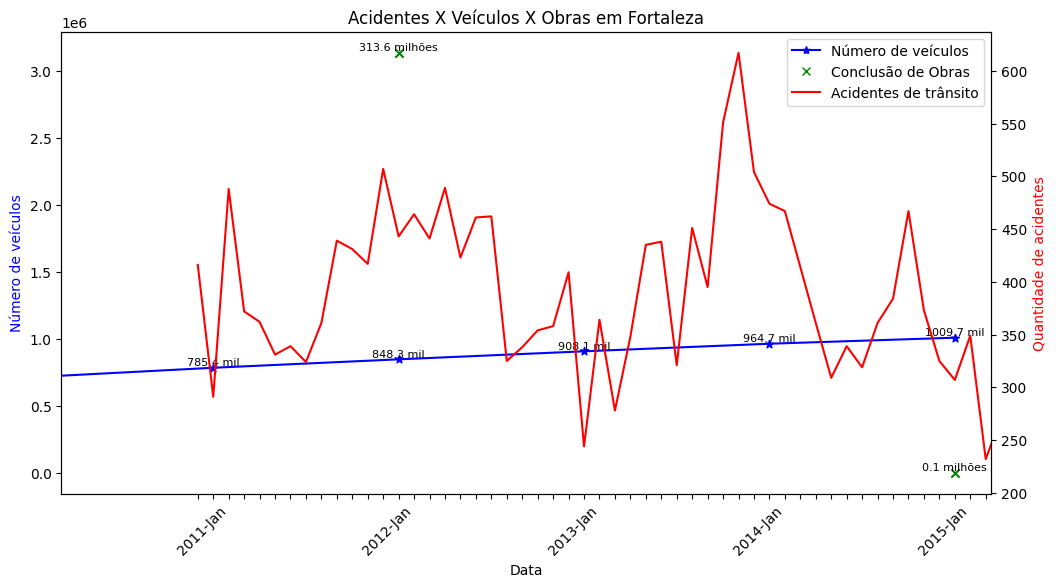

In [10]:
# Lista de siglas de todos os estados em ordem alfabética
estados = sorted([
    'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 
    'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'
])


# Dicionário de tradução dos nomes dos meses
meses_pt = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}


# Widgets para entrada de dados
mes_inicio_widget = widgets.BoundedIntText(
    value=10,
    min=1,
    max=12,
    step=1,
    description='Mês Início:',
    disabled=False
)
ano_inicio_widget = widgets.BoundedIntText(
    value=2011,
    min=1900,
    max=2100,
    step=1,
    description='Ano Início:',
    disabled=False
)
mes_fim_widget = widgets.BoundedIntText(
    value=9,
    min=1,
    max=12,
    step=1,
    description='Mês Fim:',
    disabled=False
)
ano_fim_widget = widgets.BoundedIntText(
    value=2014,
    min=1900,
    max=2100,
    step=1,
    description='Ano Fim:',
    disabled=False
)
estado_widget = widgets.Dropdown(
    options=estados,
    value='PR',
    description='Estado:',
    disabled=False
)
cidade_widget = widgets.Dropdown(
    options=[],
    description='Cidade:',
    disabled=True
)

def carregar_cidades(estado):
    url = f"https://servicodados.ibge.gov.br/api/v1/localidades/estados/{estado}/municipios"
    response = requests.get(url)
    municipios = response.json()
    municipios.sort(key=lambda x: x['nome'])
    return {municipio['nome']: municipio['id'] for municipio in municipios}

def atualizar_cidades(*args):
    estado = estado_widget.value
    cidades = carregar_cidades(estado)
    cidade_widget.options = list(cidades.keys())
    cidade_widget.disabled = False

estado_widget.observe(atualizar_cidades, 'value')

def executar_funcao(b):
    mes_inicio = mes_inicio_widget.value
    ano_inicio = ano_inicio_widget.value
    mes_fim = mes_fim_widget.value
    ano_fim = ano_fim_widget.value
    estado = estado_widget.value
    cidade = cidade_widget.value
    cidades = carregar_cidades(estado) 
    codigo_cidade = cidades[cidade]

    # Busca os dados
    df_frota = pd.DataFrame(arquivos_frota(ano_inicio, ano_fim, estado, codigo_cidade, cidade))
    if df_frota.empty:
        print('df_frota:', df_frota)
        print("Dados insuficientes para gerar o gráfico.")
        return
    
    df_obras = pd.DataFrame(arquivos_obras(ano_inicio, ano_fim, estado, codigo_cidade, cidade))
    if df_obras.empty:
        print('Não houve conclusão de obras nesse:', df_obras)
    
    df_acidentes = pd.DataFrame(arquivos_SIH(mes_inicio, ano_inicio, mes_fim, ano_fim, estado, codigo_cidade, cidade))
    if df_acidentes.empty:
        print('df_acidentes:', df_acidentes)
        print("Dados insuficientes para gerar o gráfico.")
        return

    # Define a quantidade
    df_frota_grouped = df_frota.groupby(['ano'])['Total veículos'].sum().reset_index()
    df_acidentes_grouped = df_acidentes.groupby(['estado', 'ano', 'mes'])['Acidentes de trânsito'].sum().reset_index()

    marcadores_obras = []

    for index, obra in df_obras.iterrows():
        # Criando marcador para o ano de início
        inicio_obra = {
            "ano": obra["ano de início"],
            "cor": "yellow",
            "valor": obra["Valor desembolsado"]
        }
        
        # Criando marcador para o ano de conclusão
        fim_obra = {
            "ano": obra["ano de conclusão"],
            "cor": "green",
            "valor": obra["Valor desembolsado"]
        }
        
        # Adicionando os novos objetos à nova lista
        marcadores_obras.append(inicio_obra)
        marcadores_obras.append(fim_obra)

    # Agrupando as obras pelo ano de conclusão e somando o valor desembolsado
    obras_concluidas = {}
    for obra in marcadores_obras:
        if obra['ano'] in obras_concluidas:
            obras_concluidas[obra['ano']] += obra['valor']
        else:
            obras_concluidas[obra['ano']] = obra['valor']


    # Define as datas
    df_frota_grouped['data'] = df_frota_grouped['ano'].astype(str)
    df_acidentes_grouped['data'] = df_acidentes_grouped['ano'].astype(str)

    # Obter a data mais antiga e a mais recente
    data_mais_antiga = pd.Timestamp(year=ano_inicio_widget.value, month=mes_inicio_widget.value, day=1)
    data_mais_recente = pd.Timestamp(year=ano_fim_widget.value, month=mes_fim_widget.value, day=1)
        
    # Calcular o número de meses de diferença entre as datas
    diferenca_meses = (data_mais_recente.year - data_mais_antiga.year) * 12 + (data_mais_recente.month - data_mais_antiga.month)
    if(diferenca_meses == 0):diferenca_meses = 1

    # Plota o gráfico
    plt.figure(figsize=(12, 6))
    
    plt.scatter(df_frota_grouped['ano'], df_frota_grouped['Total veículos'], label='Número de veículos' , color='b', marker='*')
    for ano, total_carros in zip(df_frota_grouped['ano'], df_frota_grouped['Total veículos']):
        if ano >= ano_inicio_widget.value + (1 if mes_inicio_widget.value != 1 else 0) and ano <= ano_fim_widget.value: #Verificação para não deixar pontos fora do gráfico
            total_carros_mil = total_carros * 0.001  # Convertendo para mil
            plt.text(ano, total_carros, f'{total_carros_mil:.1f} mil', ha='center', va='bottom', fontsize=8)

    # Plota o gráfico de dispersão das obras concluídas
    for ano, valor in obras_concluidas.items():
        if ano >= ano_inicio_widget.value + (1 if mes_inicio_widget.value != 1 else 0) and ano <= ano_fim_widget.value:
           valor_milhoes = valor * 0.000001  # Convertendo para milhões
           plt.scatter(ano, valor * 0.01, color='green', label='Obras', marker='x')
           plt.text(ano, valor * 0.01, f'{valor_milhoes:.1f} milhões', ha='center', va='bottom', fontsize=8)


    plt.plot(df_frota_grouped['ano'], df_frota_grouped['Total veículos'], label='Número de veículos', color='b')
    plt.ylabel('Número de veículos', color='b')
    plt.xlabel('Data')

    labels_acidentes = [f'{ano}-{meses_pt[mes % 100]}' if mes == 1 else '' for ano, mes in zip(df_acidentes_grouped['ano'], df_acidentes_grouped['mes'])]
    plt.xticks(df_acidentes_grouped['ano'] + df_acidentes_grouped['mes'] / 12, labels_acidentes, rotation=45, ha='right')  # Ajusta a rotação e alinhamento

    plt.twinx()  # Cria um segundo eixo y para os acidentes
    plt.plot(df_acidentes_grouped['ano'] + df_acidentes_grouped['mes'] / 12, df_acidentes_grouped['Acidentes de trânsito'] * 100, label='Acidentes de trânsito', color='r')

    # Ajusta o eixo y para exibir valores divididos por 100
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100:.0f}'))

    limite_inferior_x = data_mais_antiga.year + data_mais_antiga.month / diferenca_meses
    limite_superior_x = data_mais_recente.year + data_mais_recente.month / diferenca_meses

    plt.xlim(limite_inferior_x, limite_superior_x)

    plt.title(f'Acidentes X Veículos X Obras em {cidade}')
    plt.ylabel('Quantidade de acidentes', color='red')

    # Adiciona legenda com nome dos meses pares
    lines, labels = plt.gca().get_legend_handles_labels()
    
    # Adiciona legenda para as obras
    plt.scatter([], [], color='green', label='Conclusão de Obras (em milhões)', marker='x')

    handles = [plt.Line2D([], [], color='b', marker='*', linestyle='-', label='Número de veículos'),
           plt.Line2D([], [], color='green', marker='x', linestyle='', label='Conclusão de Obras'),
           plt.Line2D([], [], color='r', marker='', linestyle='-', label='Acidentes de trânsito')]

    # Adiciona a legenda
    plt.legend(handles=handles)

    # Exibe o gráfico
    plt.show()


# Botão para executar a função
executar_button = widgets.Button(
    description='Executar',
    disabled=False,
    button_style='',
    tooltip='Clique para executar',
    icon='check'
)
executar_button.on_click(executar_funcao)

# Atualizar as cidades na inicialização para o estado selecionado por padrão
atualizar_cidades(None)

# Exibir widgets
display(mes_inicio_widget, ano_inicio_widget, mes_fim_widget, ano_fim_widget, estado_widget, cidade_widget, executar_button)
